# Task 3: "Iris Flower Classification"

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression , Ridge 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
from sklearn.model_selection import train_test_split

### Getting the data ready

In [2]:
Iris_df = pd.read_csv("IRIS.csv")
Iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# checking data types
Iris_df.dtypes                  # We have to convert "species" into numeric form

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [4]:
# checking for missing/ NaN values

Iris_df.isna().sum()            # No missing values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Data Visualizations

### Sepal Length and Width plots

C:\Users\DELL\Desktop\sample_project1\env\Lib\site-packages\matplotlib\collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


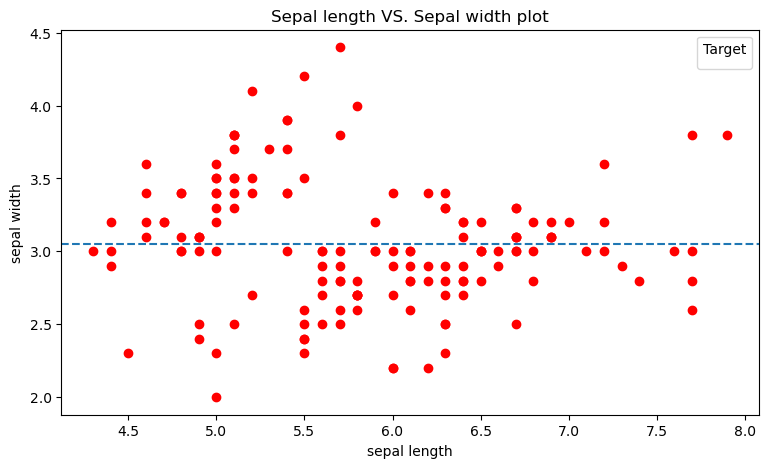

In [5]:
fig , ax = plt.subplots(figsize = (9,5))
scatter = ax.scatter(x=Iris_df["sepal_length"],c="red" , y = Iris_df["sepal_width"])  
ax.set(title = "Sepal length VS. Sepal width plot" ,
       xlabel = "sepal length" ,
       ylabel = "sepal width")

ax.legend(*scatter.legend_elements() , title ="Target");
ax.axhline(Iris_df["sepal_width"].mean() , linestyle = '--');

Text(0, 0.5, 'Length & Width')

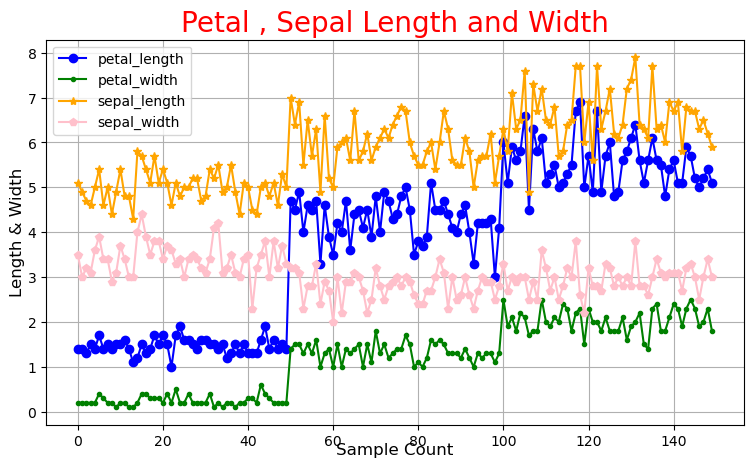

In [6]:
Iris_df["petal_length"].plot(kind="line",legend=True , marker="o" , c="blue",figsize=(9,5), grid=True)
Iris_df["petal_width"].plot(kind="line",legend=True , marker="." , c="green",figsize=(9,5), grid=True)
Iris_df["sepal_length"].plot(kind="line",legend=True , marker="*" , c="orange",figsize=(9,5), grid=True)
Iris_df["sepal_width"].plot(kind="line",legend=True , marker="p" , c="pink",figsize=(9,5), grid=True)
plt.title("Petal , Sepal Length and Width" , fontdict={'fontsize': 20, 'color': 'r','verticalalignment': 'baseline',})
plt.xlabel("Sample Count", fontdict={'fontsize': 12, 'color': 'black','verticalalignment': 'baseline',})
plt.ylabel("Length & Width",fontdict={'fontsize': 12, 'color': 'black','verticalalignment': 'baseline',})

## Machine learning model building

### Converting target variable "species" into numeric form using encoding

In [7]:
encoder = LabelEncoder()
Iris_df["species"]=encoder.fit_transform(Iris_df["species"])
Iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
Iris_df.iloc[143]

sepal_length    6.8
sepal_width     3.2
petal_length    5.9
petal_width     2.3
species         2.0
Name: 143, dtype: float64

### Splitting data into x and y

In [9]:
x = Iris_df.drop("species" , axis=1)
y= Iris_df["species"]

x_train,x_test , y_train,y_test = train_test_split(x , y , test_size=0.2)

# Training our model fitting it and evaluating it

model = LogisticRegression()
model.fit(x_train , y_train)
model.score(x_test , y_test)

C:\Users\DELL\Desktop\sample_project1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9333333333333333

### Making predictions of Iris species

#### '0' is iris-setosa , '1' is iris-versicolor      '2' is iris-verginica 

In [10]:
species_preds = model.predict(x_test)
species_preds

array([1, 2, 1, 2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1, 1, 2, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 0, 0, 1])